In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
df=sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


###  Missing Values Treatment

In [4]:
df['embarked'].fillna(method="bfill",inplace=True)
df['age']=df.groupby(['embarked','pclass','sex'])['age'].transform(lambda x: x.fillna(x.median()))
df['embark_town'].fillna(method="bfill",inplace=True)

In [5]:
# droping column which has more than 50% missing values
df.drop(["deck"],axis=1,inplace=True)

In [6]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

### Delecting duplicates

In [7]:
df.drop_duplicates(inplace=True)

## Spliting  the data as train and test

In [8]:
X=df[["pclass","sex","embarked","age","fare"]]
Y=df[["survived"]]

In [9]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.25)

##  Data Preprocessing

In [10]:
# separting the categorical data and continuous data on both train and test data
XtrainCont=Xtrain[["fare","age"]]
XtrainCat=Xtrain[["pclass","sex","embarked"]]
XtestCont=Xtest[["fare","age"]]
XtestCat=Xtest[["pclass","sex","embarked"]]


## Transformations&scalling the Continuous data

### Scaling the data

<AxesSubplot: >

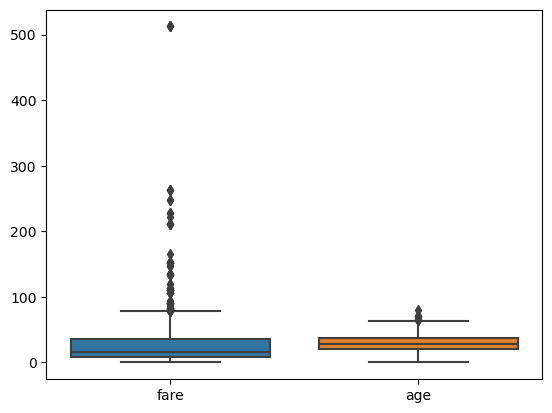

In [11]:
sns.boxplot(XtrainCont)

* from above plot we can see that there are some outliers in fare sso we can use `Robust Scalar` to scale the data

In [12]:
from sklearn.preprocessing import RobustScaler
robust_scalar=RobustScaler()

In [13]:
XtrainContscaled=pd.DataFrame(robust_scalar.fit_transform(XtrainCont),
                             columns=XtrainCont.columns,
                             index=XtrainCont.index)

In [14]:
XtestContscaled=pd.DataFrame(robust_scalar.transform(XtestCont),
                             columns=XtestCont.columns,
                             index=XtestCont.index)

<AxesSubplot: ylabel='Count'>

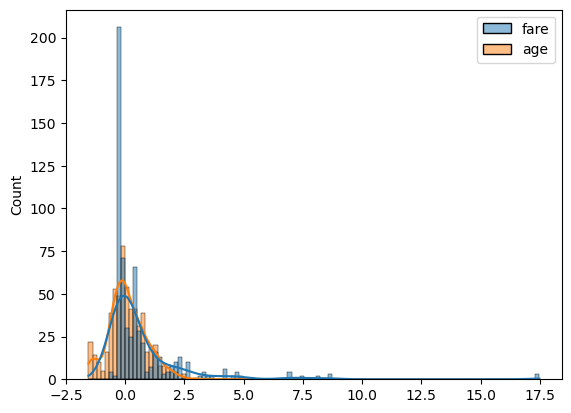

In [15]:
sns.histplot(XtrainContscaled,kde=True)

* data is not in a normal distribution so we can transform the data

### Transformations

* yeo-johnson transformer was used to transform the data 

In [16]:
from sklearn.preprocessing import PowerTransformer
yeoJohn=PowerTransformer()

In [17]:
Final_Cont_Train=pd.DataFrame(yeoJohn.fit_transform(XtrainContscaled),
                       columns=XtrainContscaled.columns,
                       index=XtrainContscaled.index)

<AxesSubplot: ylabel='Count'>

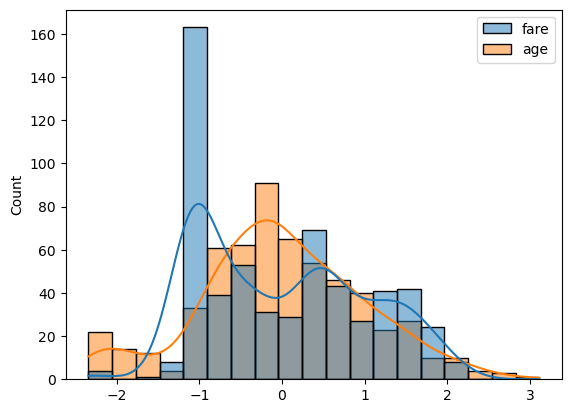

In [18]:
sns.histplot(Final_Cont_Train,kde=True)

In [19]:
Final_Cont_Test=pd.DataFrame(yeoJohn.transform(XtestContscaled),
                       columns=XtestContscaled.columns,
                       index=XtestContscaled.index)

## Encoding the Categorical data

In [20]:
XtrainCatOrd=XtrainCat[["pclass"]]
XtestCatOrd=XtestCat[["pclass"]]
XtrainCatNor=XtrainCat[["sex","embarked"]]
XtestCatNor=XtestCat[["sex","embarked"]]


* ordinal categorical data is in ordinal from so we no need to change it

* Norminal categorical data can be changed by using one-hot encoding

In [21]:
from sklearn.preprocessing import OneHotEncoder
one_hot=OneHotEncoder(sparse=False)

In [22]:
XtrainCatNorend=pd.DataFrame(one_hot.fit_transform(XtrainCatNor),
                            index=XtrainCatNor.index,
                            columns=one_hot.get_feature_names_out(XtrainCatNor.columns))

In [23]:
XtestCatNorend=pd.DataFrame(one_hot.transform(XtestCatNor),
                            index=XtestCatNor.index,
                            columns=one_hot.get_feature_names_out(XtestCatNor.columns))

* Merging the Ordinal and Norminal categorical data both train and test

In [24]:
Final_cat_Train = pd.merge(XtrainCatOrd, XtrainCatNorend, left_index=True, right_index=True)
Final_cat_Train

,pclass,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
525,3,0.0,1.0,0.0,1.0,0.0
869,3,0.0,1.0,0.0,0.0,1.0
725,3,0.0,1.0,0.0,0.0,1.0
618,2,1.0,0.0,0.0,0.0,1.0
53,2,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
749,3,0.0,1.0,0.0,1.0,0.0
82,3,1.0,0.0,0.0,1.0,0.0
584,3,0.0,1.0,1.0,0.0,0.0
372,3,0.0,1.0,0.0,0.0,1.0


In [25]:
Final_cat_Test = pd.merge(XtestCatOrd, XtestCatNorend, left_index=True, right_index=True)
Final_cat_Test

,pclass,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
699,3,0.0,1.0,0.0,0.0,1.0
167,3,1.0,0.0,0.0,0.0,1.0
449,1,0.0,1.0,0.0,0.0,1.0
218,1,1.0,0.0,1.0,0.0,0.0
27,1,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...
805,3,0.0,1.0,0.0,0.0,1.0
390,1,0.0,1.0,0.0,0.0,1.0
643,3,0.0,1.0,0.0,0.0,1.0
380,1,1.0,0.0,1.0,0.0,0.0


# Task-1

# Creating a module after normalizing and encoding the data

* Merging the data which has 
    * Scaled and Normalization --->`Continuous Data` 
    * Encoded ---> `Categorical Data`

In [26]:
Final_Train=pd.merge(Final_Cont_Train,Final_cat_Train,left_index=True,right_index=True)
Final_Train

,fare,age,pclass,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
525,-1.075190,0.805760,3,0.0,1.0,0.0,1.0,0.0
869,-0.672071,-2.020815,3,0.0,1.0,0.0,0.0,1.0
725,-0.959155,-0.666539,3,0.0,1.0,0.0,0.0,1.0
618,0.834452,-2.020815,2,1.0,0.0,0.0,0.0,1.0
53,0.388603,0.019832,2,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
749,-1.075190,0.162986,3,0.0,1.0,0.0,1.0,0.0
82,-1.070312,-0.666539,3,1.0,0.0,0.0,1.0,0.0
584,-0.952956,-0.201480,3,0.0,1.0,1.0,0.0,0.0
372,-1.036430,-0.746638,3,0.0,1.0,0.0,0.0,1.0


In [27]:
Final_Test=pd.merge(Final_Cont_Test,Final_cat_Test,left_index=True,right_index=True)
Final_Test

,fare,age,pclass,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
699,-1.088244,0.902712,3,0.0,1.0,0.0,0.0,1.0
167,0.470774,1.093580,3,1.0,0.0,0.0,0.0,1.0
449,0.571972,1.525179,1,0.0,1.0,0.0,0.0,1.0
218,1.410865,0.233382,1,1.0,0.0,1.0,0.0,0.0
27,1.992905,-0.746638,1,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
805,-1.071937,0.162986,3,0.0,1.0,0.0,0.0,1.0
390,1.686303,0.508054,1,0.0,1.0,0.0,0.0,1.0
643,1.178766,-0.277013,3,0.0,1.0,0.0,0.0,1.0
380,1.949450,0.902712,1,1.0,0.0,1.0,0.0,0.0


## Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier(max_depth=3)

In [29]:
decision_tree.fit(Final_Train,Ytrain)

DecisionTreeClassifier(max_depth=3)

In [30]:
yTestpred=decision_tree.predict(Final_Test)
yTrianpred=decision_tree.predict(Final_Train)

In [31]:
from sklearn.metrics import accuracy_score as acs,confusion_matrix


acs(Ytrain,yTrianpred),acs(Ytest,yTestpred)

(0.7989690721649485, 0.8092783505154639)

## Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [33]:
LR.fit(Final_Train,Ytrain)

C:\Users\mounika katla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [34]:
YTestpred=LR.predict(Final_Test)
YTrianpred=LR.predict(Final_Train)

In [35]:
acs(Ytrain,YTrianpred),acs(Ytest,YTestpred)

(0.781786941580756, 0.7783505154639175)

# Task-2

# Creating a model on Raw Continuous data and Encoded Categorical Data 

* merging the data
    * Raw -->`Continuous Data`
    * Encoded --> `Categorical Data` 

In [36]:
Final_Train_raw=pd.merge(XtrainCont,Final_cat_Train,left_index=True,right_index=True)
Final_Train_raw


,fare,age,pclass,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
525,7.7500,40.5,3,0.0,1.0,0.0,1.0,0.0
869,11.1333,4.0,3,0.0,1.0,0.0,0.0,1.0
725,8.6625,20.0,3,0.0,1.0,0.0,0.0,1.0
618,39.0000,4.0,2,1.0,0.0,0.0,0.0,1.0
53,26.0000,29.0,2,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
749,7.7500,31.0,3,0.0,1.0,0.0,1.0,0.0
82,7.7875,20.0,3,1.0,0.0,0.0,1.0,0.0
584,8.7125,26.0,3,0.0,1.0,1.0,0.0,0.0
372,8.0500,19.0,3,0.0,1.0,0.0,0.0,1.0


In [37]:
Final_Test_raw=pd.merge(XtestCont,Final_cat_Test,left_index=True,right_index=True)
Final_Test_raw

,fare,age,pclass,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
699,7.6500,42.0,3,0.0,1.0,0.0,0.0,1.0
167,27.9000,45.0,3,1.0,0.0,0.0,0.0,1.0
449,30.5000,52.0,1,0.0,1.0,0.0,0.0,1.0
218,76.2917,32.0,1,1.0,0.0,1.0,0.0,0.0
27,263.0000,19.0,1,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
805,7.7750,31.0,3,0.0,1.0,0.0,0.0,1.0
390,120.0000,36.0,1,0.0,1.0,0.0,0.0,1.0
643,56.4958,25.0,3,0.0,1.0,0.0,0.0,1.0
380,227.5250,42.0,1,1.0,0.0,1.0,0.0,0.0


## Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_2=DecisionTreeClassifier()

In [39]:
decision_tree_2.fit(Final_Train_raw,Ytrain)

DecisionTreeClassifier()

In [40]:
yTestpred=decision_tree.predict(Final_Test_raw)
yTrianpred=decision_tree.predict(Final_Train_raw)

In [41]:
from sklearn.metrics import accuracy_score as acs,confusion_matrix


acs(Ytrain,yTrianpred),acs(Ytest,yTestpred)

(0.7628865979381443, 0.8092783505154639)

## LogisticRegression

In [42]:
from sklearn.linear_model import LogisticRegression
LR_2=LogisticRegression()

In [43]:
LR_2.fit(Final_Train_raw,Ytrain)

C:\Users\mounika katla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mounika katla\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
YTestpred=LR_2.predict(Final_Test_raw)
YTrianpred=LR_2.predict(Final_Train_raw)

In [45]:
acs(Ytrain,YTrianpred),acs(Ytest,YTestpred)

(0.7835051546391752, 0.7783505154639175)

# Insights

* From Titanic data set we can see that there is no change in accuracy of non linear model of decision tree when the data may be in Gaussian distribution or not.
* But in linear model of logistic regression there is change in accuracy before the transformation and after the transformation.
* So for the decision tree the data is not mandatory to have  in gaussian And for logistic regression the data must be in    gaussian.
* In decision tree the overfitting is heavy .So we have fixed the depth to get the good accuracy.

# Analysis

* From titanic dataset we have taken `survived` columns as target variable and `fare`,`age`,`sex`,`pclass`,`embarked` as an predictable variable

In [47]:
df.groupby(["pclass","survived"])["survived"].count()

pclass  survived
1       0            77
        1           135
2       0            81
        1            82
3       0           297
        1           104
Name: survived, dtype: int64

* from `pclass` we can see that `pclass(1)` has survived ratio heavy compared to other pclass.So `pclass`has connection with target column `survivied`.

In [48]:
df.groupby(["sex","survived"])["survived"].count()

sex     survived
female  0            76
        1           215
male    0           379
        1           106
Name: survived, dtype: int64

* from `sex` we can see `female` has survived ratio heavy compared to`male` .So `sex` column has connection with target column `survivied`.

In [49]:
df.groupby(["embarked","survived"])["survived"].count()

embarked  survived
C         0            65
          1            91
Q         0            38
          1            19
S         0           352
          1           211
Name: survived, dtype: int64

* from `embarked` column we can see that `embarked(S)` has  heavy death rate compared to other `embarked` class.So `embarked` column has connection with target column `survived`.

* `pclass`,`age`,`fare`,`sex`,`embarked` as the connection with target column `survived`